In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
train_df = pd.read_csv("train.csv")
print("Shape of Train Data", train_df.shape)

Shape of Train Data (750000, 10)


In [3]:
display(train_df.head(10))

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
5,5,30,59,29,Red,Pulses,10,0,9,20-20
6,6,27,62,53,Sandy,Paddy,26,15,22,28-28
7,7,36,62,44,Red,Pulses,30,12,35,14-35-14
8,8,36,51,32,Loamy,Tobacco,19,17,29,17-17-17
9,9,28,50,35,Red,Tobacco,25,12,16,20-20


In [4]:
print(train_df.isnull().sum())

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


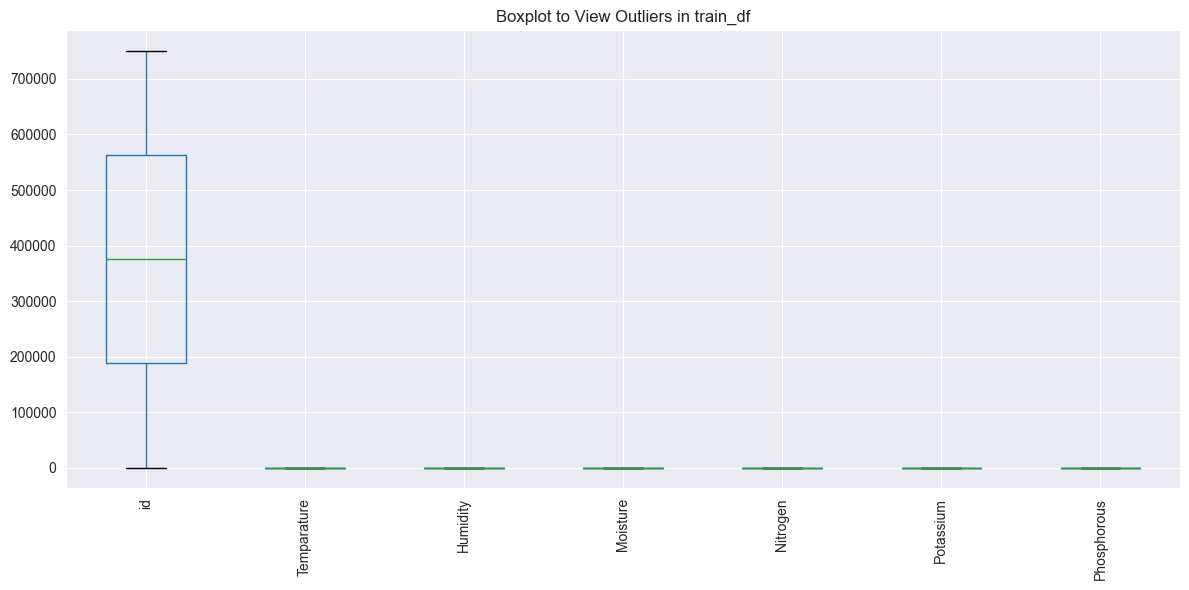

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = train_df.select_dtypes(include='number').columns

# Plot boxplots
plt.figure(figsize=(12, 6))
train_df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot to View Outliers in train_df")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numeric columns
numeric_cols = train_df.select_dtypes(include='number').columns

# Create a scaler
scaler = StandardScaler()

# Fit and transform the numeric data
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Done: train_df is now standardized
print(train_df.head())


         id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0 -1.732048     1.365380  1.348000 -0.778675    Clayey  Sugarcane  1.150683   
1 -1.732044    -1.118740  1.197572  1.680080     Sandy    Millets  0.615738   
2 -1.732039    -0.621916  0.295003 -1.117813     Sandy    Millets  0.080794   
3 -1.732035     0.868556  0.144575  0.747449     Sandy     Barley  1.418155   
4 -1.732030     0.868556 -0.457138 -0.185182       Red      Paddy  1.239840   

   Potassium  Phosphorous Fertilizer Name  
0  -0.950166    -1.301811           28-28  
1  -0.603282    -0.248908           28-28  
2   0.437369    -0.410893        17-17-17  
3   0.437369    -1.382803        10-26-26  
4  -1.297050    -0.410893             DAP  


In [7]:
X_train = train_df.drop('Fertilizer Name', axis=1)

# Target (the column you're trying to predict)
y_train = train_df['Fertilizer Name']

In [8]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame to avoid modifying original
X_train_encoded = X_train.copy()

# Label encode each object (categorical) column
label_encoders = {}  # To store encoders for inverse_transform if needed

for col in X_train_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    label_encoders[col] = le  # Save the encoder


In [9]:
y_le = LabelEncoder()
y_train_encoded = y_le.fit_transform(y_train)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [11]:
print(X_train.shape)
print(y_train.shape)

(600000, 9)
(600000,)


In [12]:
print(y_train.unique())
print(y_train.dtype)


['28-28' '20-20' '14-35-14' 'Urea' '17-17-17' '10-26-26' 'DAP']
object


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train_encoded, y_train_encoded)
